<a href="https://colab.research.google.com/github/JoaoMarcelo99/analise_atenas_aibnb/blob/main/Analisando_os_Dados_do_Airbnb_Atenas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Atenas*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Atenas, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as srn

In [ ]:
# importar o arquivo listings.csv para um DataFrame
dados = pd.read_csv('http://data.insideairbnb.com/greece/attica/athens/2021-12-23/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` = identificador único do quarto.
* `name` = nome do edifício.
* `host_id` = id do locatário.
* `host_name` = nome do locatário.
* `neighbourhood_group` = geocódigo do grupo do bairro (valores não preenchidos nesse dataset).
* `neighbourhood` = nome do bairro.
* `latitude` = latitude do quarto.
* `longitude` = longitude do quarto.
* `room_type` = tipo do quarto.
* `price` = preço.
* `minimum_nights` = minimo de noites para alugar.
* `number_of_reviews` = numero de avaliações.
* `last_review` = data da ultima avaliação.
* `reviews_per_month` = quantidade de reviews por mês.
* `calculated_host_listings_count` = numero de quartos que o locatário tem disponível na região.
* `availability_365` = disponibilidade do quarto em 365 dias.
* `number_of_reviews_ltm` = numero de avaliações nos ultimos 12 meses.
* `license` = o numero de licença.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
dados.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,70,1,32,2021-09-24,0.25,6,114,7,00000957568
1,10990,Athens Quality Apartments - Deluxe Apartment,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,50,1,54,2021-11-01,0.48,6,364,10,00001070920
2,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,38,1,76,2021-12-09,0.67,6,312,22,00000957080
3,10995,"AQA-No2 1-bedroom, smart tv, fiber connection,",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,48,1,27,2021-11-08,0.19,6,236,4,00000957422
4,27262,"54m2, 1-br, cable tv, wi-fi, metro",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,52,1,17,2020-01-08,0.15,6,176,0,00000957579


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print('Total de linhas: {}\nTotal de variaveis: {}\n'.format(dados.shape[0], dados.shape[1]))
# verificar as 5 primeiras entradas do dataset
print(dados.dtypes)

Total de linhas: 9673
Total de variaveis: 18

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


É possivel ver que boa parte dos dados presentes são numeros (como os valores `int64` e `float64`) e alguns poucos indicam que temos um certo texto (`object`), o que já era esperado.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Algo muito importante para ser levado em consideração durante a análise de dados é o quão "incompleto" está nosso conjunto de dados. Para isso, é importante vermos as entradas faltantes no nosso conjunto de dados.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(dados.isnull().sum()/dados.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.185568
reviews_per_month                 0.181640
last_review                       0.181640
name                              0.000310
host_name                         0.000103
longitude                         0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

Impressionantemente, a coluna `neighnourhood_group` está com todos os valores ausentes. Ou seja, ela não contem informação nenhuma.
A coluna `licence`, `reviews_per_month` e `last_review` estão com 18% dos valores ausentes. 

### **Q3. Qual o tipo de distribuição das variáveis?** 

Antes de olhar a distribuição das variáveis é importante verificar a presença de *outliers* afim de que a distribuição não seja distorcida. 

Mas o que são *outliers*?

*Outliers* são valores extremos que acabam distorcendo a distribuição dos dados. São os famosos pontos fora-da-curva, as exceções. Considerando o contexto da nossa análise, eles poderiam ser erros de digitação, como em vez de colocar um minimo de 3 noites para alugar, foi digitado 34300. Isso claramente influenciaria na nossa distribuição e iria distorcer nossa análise.

Com isso, foi estabelecido (de maneira arbitrária) limites máximos de 750 para `price` e 40 para `minimu_nights`. Além disso foi descartado a coluna `neighbourhood_group` já que ela não possui nenhum valor.

In [ ]:
# retirando os outliers

dados_filtrados = dados[(dados['price'] < 750) &
                        (dados['minimum_nights'] < 40)]

dados_filtrados = dados_filtrados.drop(columns='neighbourhood_group')

print('Foi preservado {:.2f}% dos dados'.format(((dados_filtrados.shape[0]) / dados.shape[0])*100))

Foi preservado 99.04% dos dados


Menos de 1% dos dados foram discartados. Isso significa que nossos dados ainda estão bem próximo do original.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b12d2bf90>,
      dtype=object)

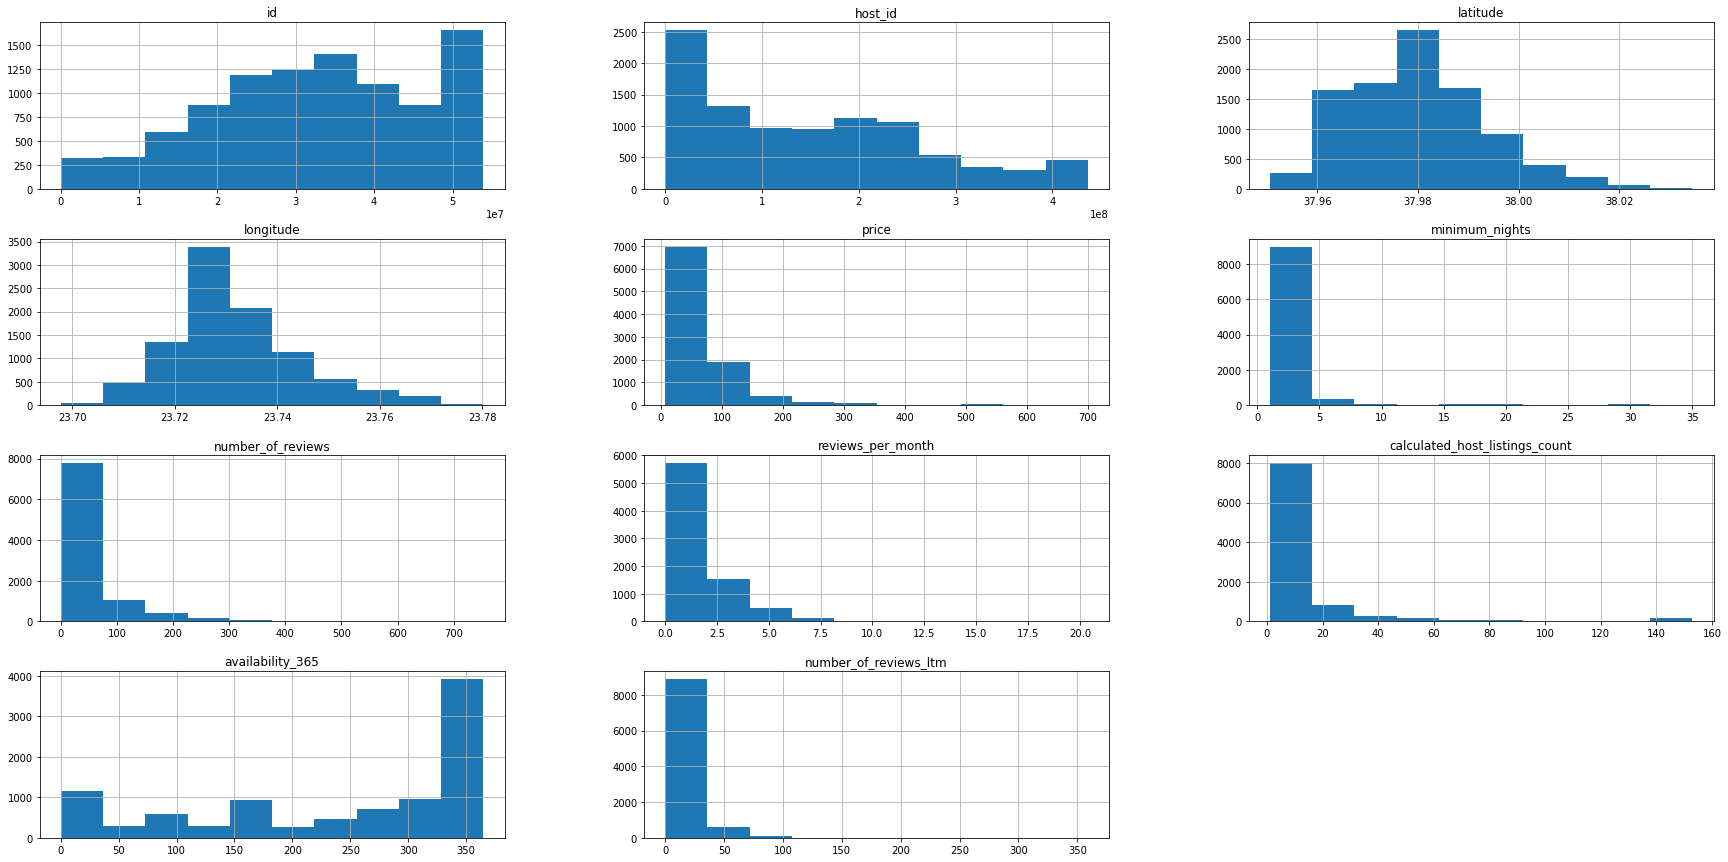

In [ ]:
# plotar o histograma das variáveis numéricas
dados_filtrados.hist(figsize=(30,15))

### **Q4. Qual a média dos preços de aluguel?**

Algo que pode ser muito interessante de se comparar é a média de preços no *airbnb*. Para isso, vamos dar uma olhada na média e também na mediana.

Por que isso?

A média, enquanto uma medida com um conceito muito comum, é extremamente afetada por valores extremos e por isso nós iremos calcular também a mediana.

Comparando a mediana com a média, podemos inferir o quanto os valores extremos estão alterando nossa medida.

In [ ]:
# ver a média da coluna `price``

print('Média:', dados_filtrados['price'].mean())
print('Mediana:',dados_filtrados['price'].median())

Média: 70.01941544885177
Mediana: 50.0


### **Q4. Qual a correlação existente entre as variáveis**

Algo muito importante durante a análise de dados é identificar a correlação entre as nossas variáveis. Isso pode indicar quais fenomenos estão aparentemente ligados. Importante porém salientar que correlação não implica em causalidade. Ou seja, não é porque determinada variavel aumenta quando a outra aumenta (ou diminui) que ela aumentou devido a essa outra variavél.

In [ ]:
# criar uma matriz de correlação
matriz_corr = dados_filtrados.corr()
# mostrar a matriz de correlação
display(matriz_corr)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.496299,-0.004995,-0.040087,-0.003463,-0.066898,-0.442515,0.039636,0.148084,0.130059,-0.014186
host_id,0.496299,1.000000,0.002456,-0.042151,0.024740,-0.071355,-0.240884,0.012560,-0.218349,0.039980,-0.043434
latitude,-0.004995,0.002456,1.000000,0.180066,-0.150549,0.077251,-0.095779,-0.112368,-0.071207,-0.055133,-0.109489
longitude,-0.040087,-0.042151,0.180066,1.000000,-0.051173,0.057861,-0.085354,-0.127217,-0.030272,-0.073373,-0.108883
price,-0.003463,0.024740,-0.150549,-0.051173,1.000000,-0.081020,-0.082885,-0.068079,0.005827,0.118300,-0.062410
minimum_nights,-0.066898,-0.071355,0.077251,0.057861,-0.081020,1.000000,-0.062366,-0.133300,-0.075182,-0.114981,-0.120746
number_of_reviews,-0.442515,-0.240884,-0.095779,-0.085354,-0.082885,-0.062366,1.000000,0.722387,-0.014425,0.017219,0.618408
reviews_per_month,0.039636,0.012560,-0.112368,-0.127217,-0.068079,-0.133300,0.722387,1.000000,0.054118,0.100675,0.817390
calculated_host_listings_count,0.148084,-0.218349,-0.071207,-0.030272,0.005827,-0.075182,-0.014425,0.054118,1.000000,0.101765,0.092706
availability_365,0.130059,0.039980,-0.055133,-0.073373,0.118300,-0.114981,0.017219,0.100675,0.101765,1.000000,0.117259


Para tornar nossa matriz mais clara...

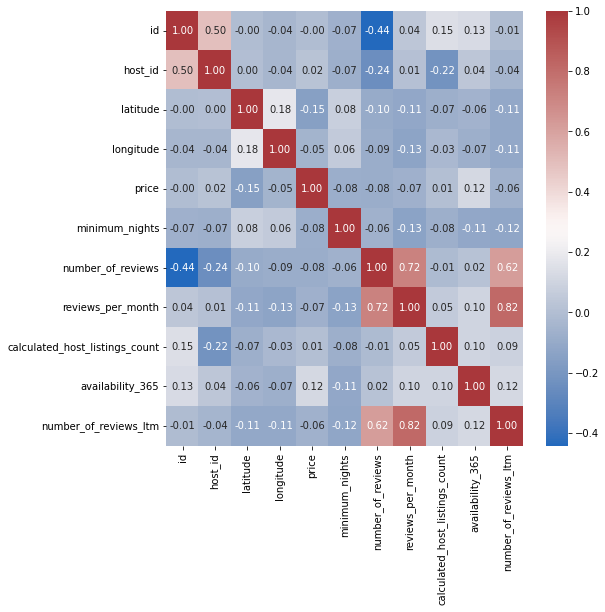

In [ ]:
# plotar um heatmap a partir das correlações
fig, ax =plt.subplots(1,1)
srn.heatmap(matriz_corr,cmap="vlag", fmt='.2f',annot=True)
fig.set_size_inches(8,8)
fig.show()

Com isso, podemos ver que algumas variaveis possuem correlação positiva, como no caso de `number_of_reviews_ltm`e `reviews_per_month`, o que faz bastante sentido. Porém, é visto também uma correlação negativa (quando uma variavel aumenta, a outra diminui) entre `id` e `number_of_reviews`. Nesse caso é bastante improvavel que o numero de identificação do apartamento influencie no número de avaliações.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Algo bom para se saber quando se planeja uma viagem é saber em que tipo de local você irá ficar hospedado.


In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
dados_filtrados['room_type'].value_counts()

Entire home/apt    8423
Private room        904
Hotel room          134
Shared room         119
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
dados_filtrados['room_type'].value_counts()/dados_filtrados.shape[0]

Entire home/apt    0.879228
Private room       0.094363
Hotel room         0.013987
Shared room        0.012422
Name: room_type, dtype: float64

Pelo visto, a grande maioria das opções do *airbnb* são as casas e apartamentos, com um total de quase 88% das opções. 

### **Q6. Qual a localidade mais cara do dataset?**



Algo interessante de se saber é qual bairro é o mais caro para se alugar. Isso pode indicar que determinado bairro possui atrações com um preço mais elevado ou pelo menos é um bairro com um maior destino.

In [ ]:
# ver preços por bairros, na média
dados_filtrados.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]

neighbourhood
ΖΑΠΠΕΙΟ                   119.397059
ΑΚΡΟΠΟΛΗ                  106.888889
ΚΟΛΩΝΑΚΙ                  100.349112
ΚΕΡΑΜΕΙΚΟΣ                 91.079832
ΒΟΤΑΝΙΚΟΣ                  87.573770
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ     87.368281
ΛΥΚΑΒΗΤΤΟΣ                 84.171171
ΘΗΣΕΙΟ                     82.592593
ΣΤΑΔΙΟ                     78.927273
ΓΚΑΖΙ                      76.414634
Name: price, dtype: float64

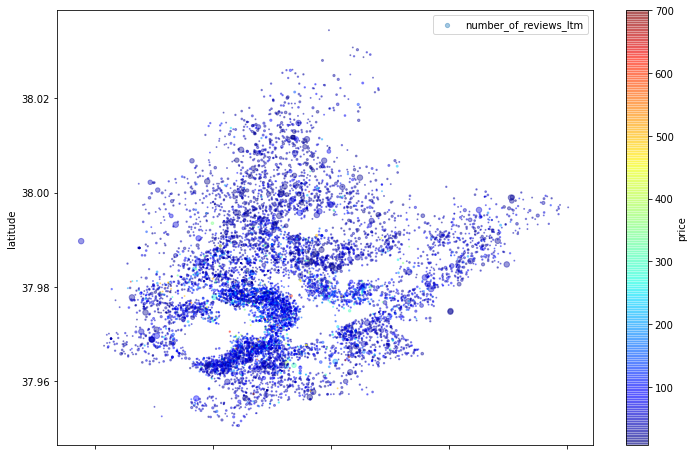

In [ ]:
# plotar os imóveis pela latitude-longitude
dados_filtrados.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                      s=dados_filtrados["minimum_nights"],label="number_of_reviews_ltm", figsize=(12,8),
                     c="price", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

É importante saber mais ou menos qual a quantidade minima de noites que é necessário para se alugar.

In [ ]:
# ver a média da coluna `minimum_nights``
dados_filtrados['minimum_nights'].mean()

2.344885177453027

Assim, vemos que o mínimo de noites fica por volta de 2 - 3 dias. Então o ideal é se preparar para ficar por no mínimo 3 dias.

## Conclusões


Atenas é uma cidade rica em pontos turísticos, com uma enorme história e incontaveis atrações. Essa rápida análise dos dados nos permite ter uma compreensão melhor a respeito das caracteristicas presentes nas opções disponíveis pelo *airbnb*. O mapa acima demonstra que embora exista uma diferença nos preços dos quartos, essa diferença não é tão discrepante, podendo-se encontrar um quarto com um certo preço mínimo em todos os locais disponíveis, de maneira que a distribuição pela cidade é bastante uniforme.

Algo importante de se salientar entretanto é que os dados analisados são uma versão mais simples e com menos atributos, o que pode impedir de se inferir uma avaliação mais precisa porém já nos dá uma ótima ideia do que podemos vir a encontrar em uma análise mais completa.